# R Coding Assignment \#8: Inequalities and Central Limit Theorem

### Sheetal Parikh
EN.605.631.81<br>
October 25, 2020
***
***

## Problem 1

A medical journal finds that men over age 50 have a mean cholesterol (HDL) of 53 with a standard deviation of 15.  A physician in a local community has 40 patients over the age of 50 and would like to know if there is increased risk for high cholesterol.

a.) What is the probability that the sample mean of the male community population over 50 would exceed 60 mg/dl?

b.) What is the probability that the sample mean of the male community population over 50 would be less than 50 mg/dl?

b.) What is the probability that the sample mean of the male community population over 50 would be low risk (e.g. less than 40 mg/dl)?

d.) Plot a distribution of the sample mean, such that the region indicating the probability the sample mean is less than 50 mg/dl is shaded a color of your choosing.

We are given that the mean HDL cholesterol is 53 mg/dl, u = 53, and the standard deviation is 15, sd = 15.  Also, the sample size is n = 40.  Therefore, we need to find the sample mean and sample distribution which will be needed for parts a through b.  Assuming that X = HDL cholesterol level is a normal distribution, we can use the formula sd/((n)^1/2) to find the standard deviation(sd_x): sd_x = 15/(40)^1/2 = 2.3717.  The mean cholesterol will be the sample mean as well: u = u_x = 53. For parts a through b, we can then use the values of the sample mean and sample standard deviation to find the probabilities which is the area under the curve within the range in question.

In [1]:
#setting sample mean
u_p1 <- 53
u_p1_x <- u_p1

#setting sample population
n_p1 <- 40

#setting standard deviation
sd_p1 <- 15

#sample standard deviation function
sd_x <- function(sd,n) {
    sd_bar <- round(sd/sqrt(n),4)
    return(sd_bar)
}

#printing sample standard deviation and sample mean
sd_p1_x <- sd_x(sd_p1,n_p1)
cat("Sample Standard Deviation = sd_x = ",sd_p1_x,"\n")
cat("Sample Mean = u_p1_x = ", u_p1_x)

Sample Standard Deviation = sd_x =  2.3717 
Sample Mean = u_p1_x =  53

a.) What is the probability that the sample mean of the male community population over 50 would exceed 60 mg/dl?

In [2]:
#P(X>60)
round(pnorm(60, mean = u_p1_x, sd = sd_p1_x, lower.tail=FALSE),8)

[1] 0.00158133

b.) What is the probability that the sample mean of the male community population over 50 would be less than 50 mg/dl?

In [4]:
#P(X<50)
prob_b <- round(pnorm(50, mean = u_p1_x, sd = sd_p1_x, lower.tail=TRUE),8)
prob_b

[1] 0.1029508

c.) What is the probability that the sample mean of the male community population over 50 would be low risk (e.g. less than 40 mg/dl)?

We can assume this probability will be extremely low around 0.  A sample mean less than 40 mg/dl would be a value that is more than 5 standard deviations less than the population mean value of 53.  A value of 40 is not even shown in the bell curve below for part d due to the small probability. However, if we visualize the the value of 40 in the bell curve, it is very visible how the probability would be approximately 0.

In [3]:
#P(X<40)
round(pnorm(40, mean = u_p1_x, sd = sd_p1_x, lower.tail=TRUE),8)

[1] 2e-08

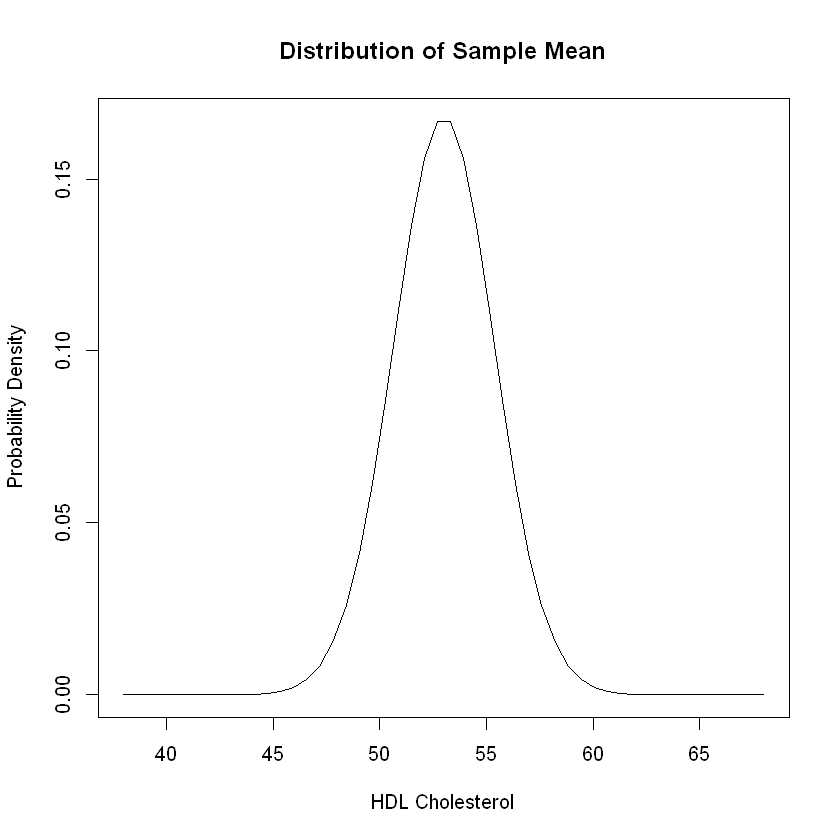

In [4]:
x=seq(38,68,length=50)
y=dnorm(x,mean=u_p1_x,sd=sd_p1_x)
plot(x,y,type="l", main="Distribution of Sample Mean", xlab="HDL Cholesterol", ylab="Probability Density") 
x=seq(38,40,length=50)
y=dnorm(x,mean=u_p1_x,sd=sd_p1_x)
polygon(c(38,x,40),c(0,y,0),col="skyblue2")

d.) Plot a distribution of the sample mean, such that the region indicating the probability the sample mean is less than 50 mg/dl is shaded a color of your choosing.

ERROR: Error in as.graphicsAnnot(labels): object 'prob_b' not found


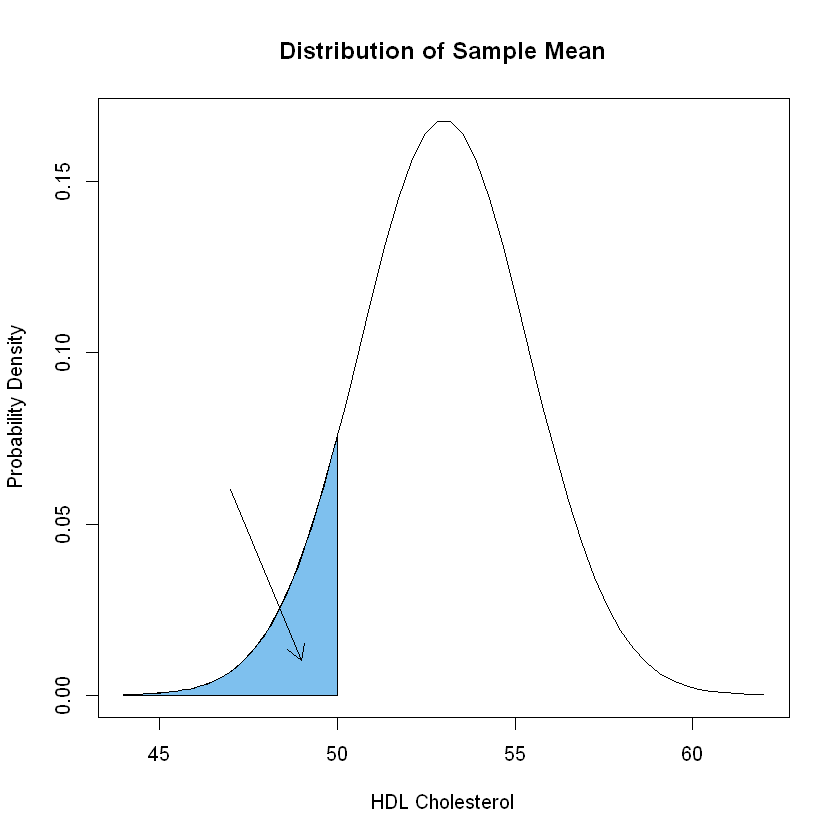

In [5]:
#setting up the bell curve
x=seq(round(u_p1_x-4*sd_p1_x,0),round(u_p1_x+4*sd_p1_x,0),length=50)
y=dnorm(x,mean=u_p1_x,sd=sd_p1_x)
plot(x,y,type="l", main="Distribution of Sample Mean", xlab="HDL Cholesterol", ylab="Probability Density") 
x=seq(round(u_p1_x-4*sd_p1_x,0),50,length=50)
y=dnorm(x,mean=u_p1_x,sd=sd_p1_x)
polygon(c(round(u_p1_x-4*sd_p1_x,0),x,50),c(0,y,0),col="skyblue2")

#adding an arrow describing the probability
arrows(47,0.06,49,0.01,length=.15)
text(47,0.07,prob_b)

#adding a red line and an arrow for the mean
abline(v = u_p1_x, col = "Red")
arrows(55,0.15,53,0.10,length=.15)
text(55,0.16,u_p1_x)

The red line represents the sample mean

## Problem 2
A medical journal finds that total mean cholesterol of men aged 45-55 is 210.8 with standard deviation 41.9 (https://www.researchgate.net/figure/The-mean-and-standard-deviation-of-plasma-total-cholesterol-levels-based-on-some-related_tbl2_257250896).

a.) What percentage of the population has a cholesterol level within one standard deviation of the mean?

b.) What percentage of the population has a cholesterol level within two standard deviations of the mean?

c.) What percentage of the population has high cholesterol?

d.) Plot a distribution of the mean cholesterol level for mean aged 45-55 shading values within one standard deviation of the mean in a color of your choosing.

We are given that the mean and standard deviation of the sample of men in the experiment, aged 45-55, is 210.8 (u_p2_x = 210.8 and sd_p2_x = 41.9) respectively.  Since parts a through b are referring to percentages for the population, we need to determine the mean and standard deviation of the population. Assuming that the population we are referring to is the entire population of men in the experiment, we can reference the article and see that the mean cholesterol for the population of men 997 in the experiment is 196.7 and the standard deviation is 39.5.  

a.) What percentage of the population has a cholesterol level within one standard deviation of the mean?

As per the normal distribution and how numbers are spread out under the bell curve, we can exepct that the probability of the population being within one standard deviation of the mean will be 68%

In [6]:
u_p2_x <- 210.8
sd_p2_x <- 41.9

u_p2 <- 196.7
sd_p2 <- 39.5

#function for calculating range of x standard deviations within the mean
sdWithinMean = function(mu,sd,x){
    mu+sd*x
}

#calculating min and max of the range within which we have to calculate the probabiliy
one_sd_min <- sdWithinMean(u_p2,sd_p2,-1)
one_sd_max <- sdWithinMean(u_p2,sd_p2,1)

#calculating probability
round(pnorm(one_sd_max, mean = u_p2, sd = sd_p2, lower.tail=TRUE) - 
    pnorm(one_sd_min, mean = u_p2, sd = sd_p2, lower.tail=TRUE),4)

[1] 0.6827

We can also calculate the standard error and establish a confidence interval, to determine how confident or certain we are that the true population mean falls within a given range.  As stated earlier, the population in question is the population of all the men in the experiment. Based on the article, the population men is 997.  The sample size of men between the ages of 44-55 would be 488 men. We know the sd of this sample: 41.9.  The sample mean would remain at 210.8.  Using this information we can construct the 68% confidence interval.

In [11]:
#sample sd
sample_n <- 488
sample_sd <- 41.9

#calculating population variance
pop_variance <- (sample_n/(sample_n-1))*sample_sd^2

#calculating standard error
SE <- sqrt(pop_variance/sample_n)
#SE

#68% confidence interval range: (210.8 - 1.0*SE, 210.8+1.0*SE)
interval_min <- round(u_p2_x - 1.0*SE,2)
#interval_min
interval_max <- round(u_p2_x + 1.0*SE,2)
#interval_max

cat("We are 68% confident that the true population mean of cholesterol is 210.8 ± (1.0) x (SE),
or between", interval_min, "and", interval_max,"mg/dl.")

We are 68% confident that the true population mean of cholesterol is 210.8 ± (1.0) x (SE),
or between 208.9 and 212.7 mg/dl.

b.) What percentage of the population has a cholesterol level within two standard deviations of the mean?

As per the normal distribution and how numbers are spread out under the bell curve, we can exepct that the probability of the population being within one standard deviation of the mean will be 95%

In [12]:
#calculating range for two standard deviations within the mean
two_sd_min <- sdWithinMean(u_p2,sd_p2,-2)
two_sd_max <- sdWithinMean(u_p2,sd_p2,2)

#calculating probability
prob2_b <- round(pnorm(two_sd_max, mean = u_p2, sd = sd_p2, lower.tail=TRUE) - 
    pnorm(two_sd_min, mean = u_p2, sd = sd_p2, lower.tail=TRUE),4)
prob2_b

[1] 0.9545

As in part a, we can also construct a confidence interval.  For part b we can construct a 95% confidence interval.

In [13]:
interval_min2 <- u_p2_x - 1.96*SE
interval_max2 <- u_p2_x + 1.96*SE

cat("We are 95% confident that the true population mean of cholesterol is 210.8 ± (1.96) x (SE),
or between", interval_min2, "and", interval_max2,"mg/dl.")

We are 95% confident that the true population mean of cholesterol is 210.8 ± (1.96) x (SE),
or between 207.0786 and 214.5214 mg/dl.

c.) What percentage of the population has high cholesterol?

In [14]:
#as per PDF provided with homework questions, High Cholesterol = greater than 240

#calculating probability P(X>240), if X = cholesterol level for Male population in experiment
round(pnorm(240, mean = u_p2, sd = sd_p2, lower.tail=FALSE),8)

[1] 0.1364951

If we wanted to know the percentage of the sample that has high cholesterol we would do the following:

In [15]:
round(pnorm(240, mean = u_p2_x, sd = sd_p2_x, lower.tail=FALSE),8)

[1] 0.2429335

d.) Plot a distribution of the men cholesterol level for mean aged 45-55 shading values within one standard deviation of the mean in a color of your choosing.

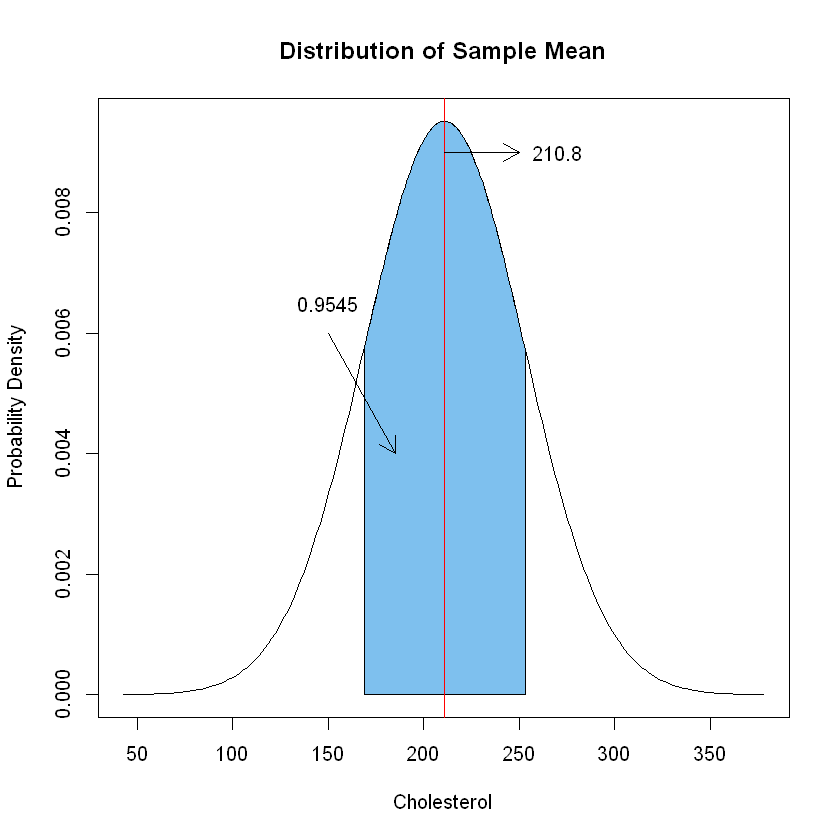

In [16]:
#setting up the bell curve
x=seq(round(u_p2_x-4*sd_p2_x,0),round(u_p2_x+4*sd_p2_x,0),length=200)
y=dnorm(x,mean=u_p2_x,sd=sd_p2_x)
plot(x,y,type="l", main="Distribution of Sample Mean", xlab="Cholesterol", ylab="Probability Density") 
x=seq(round(u_p2_x-1*sd_p2_x,0),round(u_p2_x+1*sd_p2_x,0),length=100)
y=dnorm(x,mean=u_p2_x,sd=sd_p2_x)
polygon(c(round(u_p2_x-1*sd_p2_x,0),x,round(u_p2_x+1*sd_p2_x,0)),c(0,y,0),col="skyblue2")

#arrows describing the probability of the shaded area under the bell curve
arrows(150,0.006,185,0.004,length=.15)
text(150,0.0065,prob2_b)

#adding a red line and an arrow for the mean
abline(v = u_p2_x, col = "Red")
arrows(u_p2_x,0.009,250,0.009,length=.15)
text(270,0.009,u_p2_x)

## References



http://rstudio-pubs-static.s3.amazonaws.com/78857_86c2403ca9c146ba8fcdcda79c3f4738.html

https://academic.csuohio.edu/kneuendorf/c53102/hand12.pdf

https://courses.lumenlearning.com/introstats1/chapter/a-population-proportion/
